In [65]:
#libraries
import pandas as pd
import warnings
from psmpy import PsmPy
from psmpy.functions import cohenD
from psmpy.functions import *
sns.set(rc={'figure.figsize':(10,8), 'font.size': 1.3})
import re

In [66]:
#Read DataFrames
warnings.filterwarnings("ignore")
df_dataset = pd.read_csv('datasets/SetRegexFin.csv')
df_comorb = pd.read_csv('datasets/regex_comorb.csv')
df_antfam = pd.read_csv('datasets/regex_antfam.csv')
df_diag = pd.read_csv('datasets/regex_diag.csv')
df_catescolar = pd.read_csv('datasets/CatEscolaridad.csv')
df_catedociv = pd.read_csv('datasets/CatEstadoCivil.csv')
df_catlgbt = pd.read_csv('datasets/CatLgbt.csv')
df_catEstrato = pd.read_csv('datasets/CatEstratoSocial.csv')
df_catocup = pd.read_csv('datasets/CatOcupacion.csv')
df_pais = pd.read_csv('datasets/Pais.csv')
df_lugnac = pd.read_csv('datasets/LugNac.csv')
df_EUA = pd.read_csv('datasets/EstadosEUA.csv')
df_cat008 = pd.read_csv('datasets/CatComunMet008.csv')
df_nivsoc = pd.read_csv('datasets/CatEstratoSocial.csv')

In [67]:
def gen_list(df):
    """
    Generate a list of columns in a DataFrame
    param: df_DataFrame
    return: list of columns
    """
    listexc = []
    list = ['FolioId','Migracion', 'Edad', 'Sexo', 'EstadoCivil', 'Escolaridad' , 'Ocupacion', 'NivSocioEco', 'ComunidadIndigena', 'DiscapacidadPerceptual' ] # Columns to include
    for col in df.columns:
        if col not in list:
            listexc.append(col) # Columns to exclude
    return listexc 
    

In [68]:
def get_psm(df_dataset, listinclude):
    """
    Initialize PsmPy Class
    param: df_DataFrame, list of columns to exclude
    return: psm object
    """
    psm = PsmPy(df_dataset, treatment= 'Migracion', indx= 'FolioId', exclude = listinclude)
    psm.logistic_ps()
    return psm

In [69]:
def moddatagen(df_dataset):
    """
    Modify the DataFrame to be used in the PSM
    param: df_DataFrame
    return: df_DataFrame modified
    """
    df_dataset['Migracion'] = df_dataset['Migracion'].fillna(0)
    df_dataset['Migracion'] = df_dataset['Migracion'].replace('Si', 1)
    df_dataset['ComunidadIndigena'] = df_dataset['ComunidadIndigena'].fillna(0)
    df_dataset['ComunidadIndigena'] = df_dataset['ComunidadIndigena'].replace('Si', 1)
    df_dataset['DiscapacidadPerceptual'] = df_dataset['DiscapacidadPerceptual'].fillna(0)
    df_dataset['DiscapacidadPerceptual'] = df_dataset['DiscapacidadPerceptual'].replace('Si', 1)
    df_dataset['Migracion']
    return df_dataset


In [70]:
def dict_data (df_catescolar, df_catedociv, df_catlgbt, df_catocup, df_pais, df_nivsoc):
    """
    Generate a dictionary of the categories in the DataFrames
    param: df_DataFrames
    return: dictionaries
    """
    dict_escolar = dict(zip(df_catescolar['Descripcion'], df_catescolar['ComunId']))
    dict_edociv = dict(zip(df_catedociv['Descripcion'], df_catedociv['ComunId']))
    dict_lgbt = dict(zip(df_catlgbt['Descripcion'], df_catlgbt['ComunId']))
    dict_ocup = dict(zip(df_catocup['Descripcion'], df_catocup['ComunId']))
    dict_pais = dict(zip(df_pais['PaisId'], df_pais['Descripcion']))
    dict_nivsoc = dict(zip(df_nivsoc['ComunId'], df_nivsoc['Descripcion']))
    return dict_escolar, dict_edociv, dict_lgbt, dict_ocup, dict_pais, dict_nivsoc

In [71]:
def mod_data (df ,dict_escolar, dict_edociv, dict_lgbt, dict_ocup, dict_pais, dict_nivsoc):
    """
    Modify the DataFrame to be used in the PSM
    param: df_DataFrame, dictionaries
    return: df_DataFrame modified
    """
    df['Escolaridad'] = df['Escolaridad'].map(dict_escolar)
    df['EstadoCivil'] = df['EstadoCivil'].map(dict_edociv)
    df['LGBTTTI'] = df['LGBTTTI'].map(dict_lgbt)
    df['Ocupacion'] = df['Ocupacion'].map(dict_ocup)
    df['PaisNac'] = df['LugarNacimiento'].map(dict_pais)
    df['NivSocioEco'] = df['NivSocioEco'].map(dict_nivsoc)
    return df
    

In [72]:
def mod_df (df):
    """
    Modify the DataFrame to be used in the PSM
    param: df_DataFrame
    return: df_DataFrame modified
    """
    df.drop(columns=['Motivo10', 'Diag_TRS_Eje1ComunNomenclatura_9', 'Diag_TRS_Eje1Previo-Subsecuente_9', 'Diag_TRS_Eje1CodigoCompuesto_9', 'Diag_TRS_Eje1Codigo_9', 'Diag_TRS_Eje1Descripcion_9', 'Diag_TRS_Eje1ComunNomenclatura_10', 'Diag_TRS_Eje1Previo-Subsecuente_10', 'Diag_TRS_Eje1CodigoCompuesto_10', 'Diag_TRS_Eje1Codigo_10', 'Diag_TRS_Eje1Descripcion_10'] , axis=1, inplace=True) # Drop columns
    df.drop(columns=['AntecedentesPNPGrupoSanguineo', 'AntecedentesPNPFactorRH', 'TipoAlimentacionSuficienteCantidad', 'TipoAlimentacionSuficienteCalidad', 'TipoAlimentacionAdecuadaCantidad', 'TipoAlimentacionAdecuadaCalidad', 'TipoAlimentacionBalanceadaCantidad', 'TipoAlimentacionBalanceadaCalidad', 'AntecedentesPNPReligion', 'AntecedentesPNPCuales'], axis=1, inplace=True) # Drop columns
    df.drop(columns=['PadecimientoActual', 'AntecedentesPadecimiento', 'AntecedentesHFTrastornosSustanciasComunId', 'AntecedentesHFTrastornosSustanciasCuales', 'AnecedentesHFTrastornosMentalesComunId', 'AnecedentesHFTrastornosMentalesCuales', 'AntecedentesHFOtrosComunId', 'AntecedentesHFOtrosCuales', 'VidaFamiliarEscolarLaboralEconomica' , 'AntecedentesSSEdadIVSA','AntecedentesSSNoParejasSexuales', 'AntecedentesSSPracticasSexualesRiesgoCuales', 'AntecedentesSSMetodosAnticonceptivosOtros', 'AntecedentesSSPruebaVIH' ], axis=1, inplace=True) # Drop columns
    df.drop(columns=['AntecedentesSSPruebaVIHFecha', 'AntecedentesSSPruebaVIHResultadoComun', 'AntecedentesSSPruebaVHC', 'AntecedentesSSPruebaVHCFecha', 'AntecedentesSSPruebaVHCResultadoComun', 'InterrogatorioASCardiovascularCuales', 'InterrogatorioASDigestivoCuales', 'InterrogatorioASEndocrinoCuales', 'InterrogatorioASHematologicoCuales', 'InterrogatorioASMusculoEsqueleticoCuales', 'InterrogatorioASNerviosoCuales'], axis=1, inplace=True) # Drop columns
    df.drop(columns=['InterrogatorioASReproductivoCuales', 'InterrogatorioASRespiratorioCuales', 'InterrogatorioASTegumentarioCuales', 'InterrogatorioASUrinarioCuales', 'InterrogatorioASEspecializadoCuales', 'SignosVitalesPeso', 'SignosVitalesTalla', 'SignosVitalesIMCComunId', 'SignosVitalesFC', 'SignosVitalesFR', 'SignosVitalesPulso', 'SignosVitalesTA', 'SignosVitalesTAhg', 'SignosVitalesTemperatura', 'HCEF_HabitusExterior', 'ExploracionEspecializadaCuales'], axis=1, inplace=True) # Drop columns
    for col in df.columns:
        reg = re.search(r'Compuesto_\d', col) 
        if reg:
            df.drop(columns=[col], axis=1, inplace=True) # Drop columns
            
    for col in df.columns:
        if col.startswith('Sust') or col.startswith('EdadI') or col.startswith('Orden') or col.startswith('UsoUlt') or col.startswith('Prime') or col.startswith('Segun') or col.startswith('Tercer') or col.startswith('Abst') or col.startswith('Ulti') or col.startswith('Dosis'):
            df.drop(columns=[col], axis=1, inplace=True)# Drop columns

    return df

In [73]:
def graf_psm(psm):
    """
    Generate a Propensity Score Matching 
    param: psm object
    return: plots
    """
    #psmdata = psm.knn_matched(matcher='propensity_logit', replacement=False, caliper=None, drop_unmatched=True) match 1:1
    psmdata = psm.knn_matched_12n(matcher='propensity_logit', how_many= 2) # match 1:N
    psm.plot_match(Title='Side by side matched controls', Ylabel='Number of patients', Xlabel='Propensity logit', names = ['Migracion', 'No Migracion'], colors = ['blue', 'red'], save=True)

,FolioId,largerclass_0group,largerclass_1group
0,304773,371985,368960
1,304816,308930,304851
2,304873,385850,332816
3,304911,310135,379454
4,304993,326717,348978
...,...,...,...
546,397336,348434,344683
547,397553,352327,373794
548,398012,326777,352829
549,398573,348567,359674


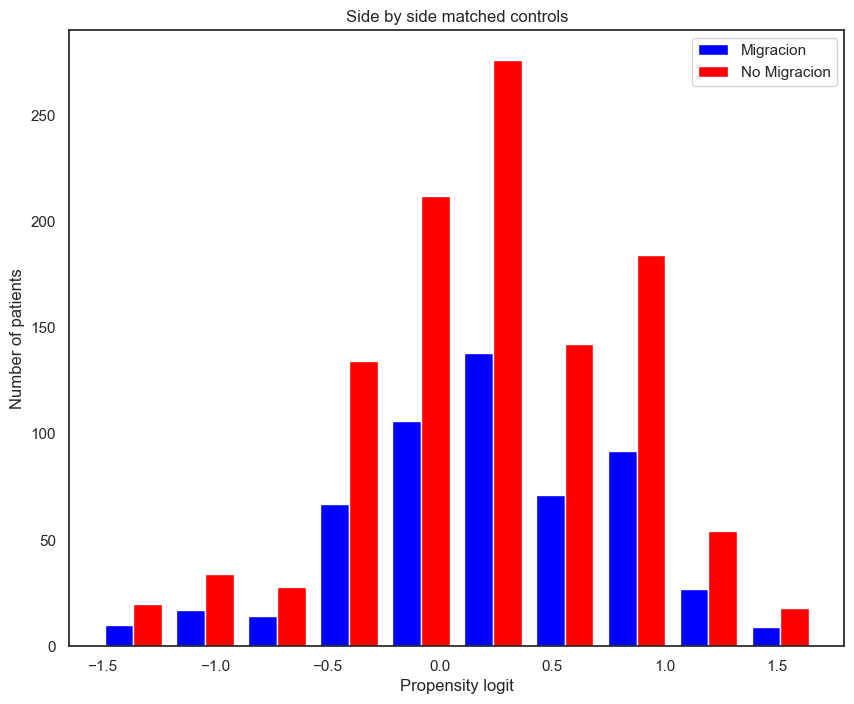

In [74]:
dict_escolar, dict_edociv, dict_lgbt, dict_ocup, dict_pais, dict_nivsoc  = dict_data(df_catescolar, df_catedociv, df_catlgbt, df_catocup, df_pais, df_nivsoc)
df = mod_df(df_dataset)
listexclude = gen_list(df_dataset)
df_dataset = moddatagen(df_dataset)
df = mod_data(df_dataset, dict_escolar, dict_edociv, dict_lgbt, dict_ocup, dict_pais, dict_nivsoc)
psm = get_psm(df, listexclude)
psm.matched_ids
graf_psm(psm)

,Variable,matching,Effect Size
0,Sexo,before,0.147037
1,Sexo,after,0.061342
2,Edad,before,0.322603
3,Edad,after,0.043904
4,EstadoCivil,before,0.103804
5,EstadoCivil,after,0.056032
6,Escolaridad,before,0.482501
7,Escolaridad,after,0.036223
8,Ocupacion,before,0.374365
9,Ocupacion,after,0.099942


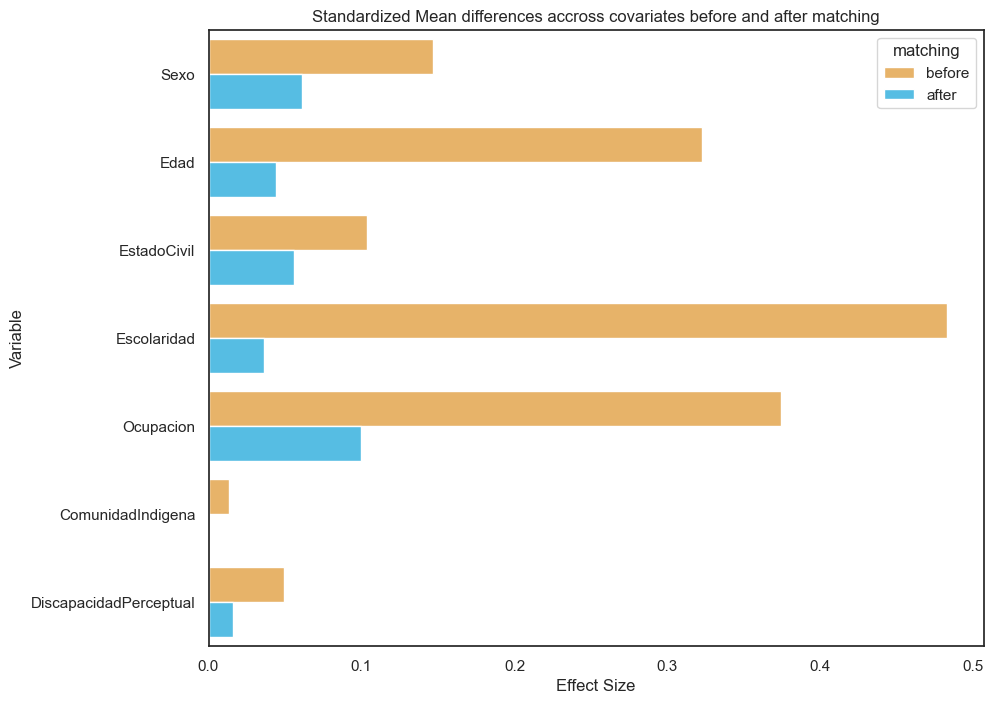

In [84]:
psm.effect_size_plot(title='Standardized Mean differences accross covariates before and after matching', before_color='#FCB754', after_color='#3EC8FB', save=True)
psm.effect_size

In [75]:
def gen_newdf (df_matched_ids, df_dataset):
    """
    Generate a new DataFrame with the matched ids
    param: df_matched_ids, df_DataFrame
    return: df_DataFrame
    """
    df_matched = df_dataset[df_dataset['FolioId'].isin(df_matched_ids['FolioId'])]
    df_matched = pd.concat([df_matched, df_dataset[df_dataset['FolioId'].isin(df_matched_ids['largerclass_0group'])]], axis= False)
    df_matched = pd.concat([df_matched, df_dataset[df_dataset['FolioId'].isin(df_matched_ids['largerclass_1group'])]], axis= False)
    return df_matched


In [76]:
def applyregex(row, regex):
    """
    Apply a regex to a row
    param: row, regex
    return: boolean
    """
    return any(re.search(regex,str(value))for value in row if value is not None)

In [77]:
def drop_col (df):
    """
    Drop columns in a DataFrame
    param: df_DataFrame
    return: df_DataFrame
    """
    for col in df.columns:
        if col.startswith('Diag') or col.startswith('Trast'):
            df.drop(columns=[col], axis=1, inplace=True) # Drop columns
    return df

In [78]:
def minertext (df, df_antfam, df_comorb, df_diag):
    """
    Apply regex to a DataFrame
    param: df_DataFrame, df_DataFrames
    return: df_DataFrame
    """
    
    #for idx, row in df_antfam.iterrows():
    #    regex = row['regex']
    #    new_colum = row['varname']
    #    df[new_colum] = df.apply(lambda row: applyregex(row,regex), axis=1).astype(int)

    #for idx, row in df_comorb.iterrows():
    #    regex = row['regex']
    #    new_colum = row['varname']
    #    df[new_colum] = df.apply(lambda row: applyregex(row,regex), axis=1).astype(int)

    #for idx, row in df_diag.iterrows():
    #   regex = row['regex']
    #    new_colum = row['varname']
    #    df[new_colum] = df.apply(lambda row: applyregex(row,regex), axis=1).astype(int)    
        
    df = drop_col (df)
    return df


In [79]:
new_df = gen_newdf(psm.matched_ids, df_dataset)
new_df.to_csv('results/MatchedData.csv', index=False)
intent = minertext(new_df, df_antfam, df_comorb, df_diag)
intent.to_csv('results/PsmRegex.csv')
df_score = psm.df_matched
df_score.to_csv('results/score-logit.csv')
